<h1 align="center">Tesla Stock Analysis</h1>

<h2 align="center">Parker Glas</h2>

### Dataset used is a secondary dataset from Kaggle.com -> 
https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

### Objective: 
Conduct an analysis of the historical price and volume trends of Tesla's stock data to gain deeper insights into its past performance.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [7]:
data = pd.read_csv("TSLA-Data.csv")
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


### Check For NA Values

In [9]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Clean data

### Check Data Types

In [12]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

The only thing I want to do is convert the date column from strings to the far more usable Pandas datetime object. All other variables are of the correct type.

In [14]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df["Date"]

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
2411   2020-01-28
2412   2020-01-29
2413   2020-01-30
2414   2020-01-31
2415   2020-02-03
Name: Date, Length: 2416, dtype: datetime64[ns]

In [15]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### Rate of Return

In [17]:
tsla_return = pd.DataFrame(np.log(df["Close"]).diff())
tsla_return.head()

,Close
0,NaN
1,-0.002515
2,-0.081723
3,-0.134312
4,-0.175470


#### Line Plot Reusable Function

In [19]:
def line_plot_func(x_values, y_values, title, y_label):
    sns.set()
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, color="#ec1515")
    plt.xlabel("Date", fontsize=14, weight="bold", labelpad=15)
    plt.xticks(rotation=45)
    plt.ylabel(y_label, fontsize=14, weight="bold", labelpad=15)
    plt.title(title, fontsize=14, weight="bold")
    sns.despine()
    plt.tight_layout(pad=1)
    plt.show()

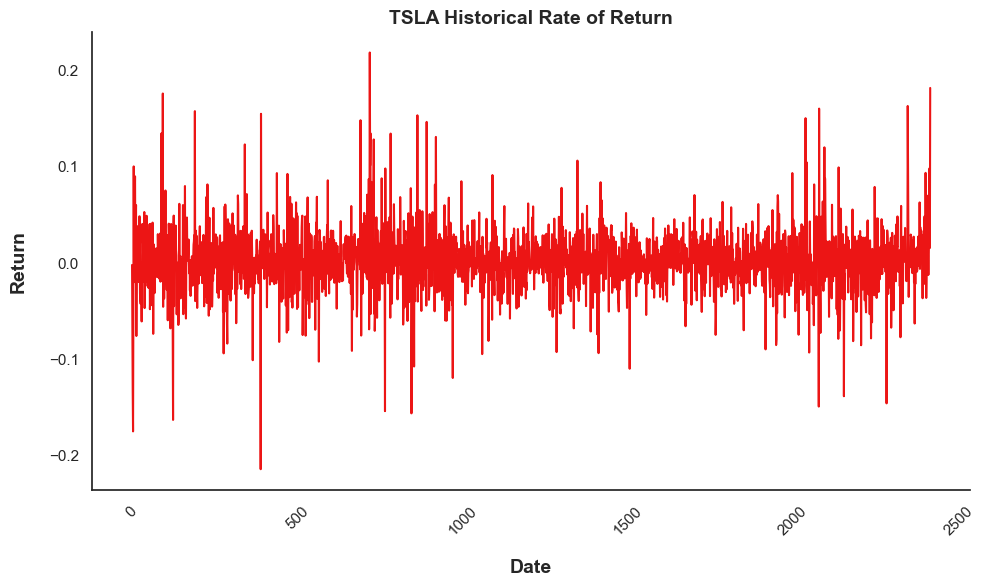

In [20]:
line_plot_func(tsla_return.index, tsla_return, "TSLA Historical Rate of Return", "Return")

Wide range of returns, espically in the start and the end of the timespan.

### Quick High-Level Overview

In [23]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,2015-04-15 11:09:56.026490112,186.271147,189.578224,182.916639,186.403651,5.572722e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,2012-11-19 18:00:00,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,2015-04-16 12:00:00,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,2017-09-07 06:00:00,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,2020-02-03 00:00:00,673.690002,786.140015,673.520020,780.000000,4.706500e+07
std,NaN,118.740163,120.892329,116.857591,119.136020,4.987809e+06


Data is from June 29th, 2010, to February 3rd, 2020.

In [25]:
diff = df.loc[len(df) - 1, "Close"] - df.loc[0, "Open"]
diff / df.loc[0, "Open"] * 100

4005.263157894737

Percentage return from start to end of timespan.

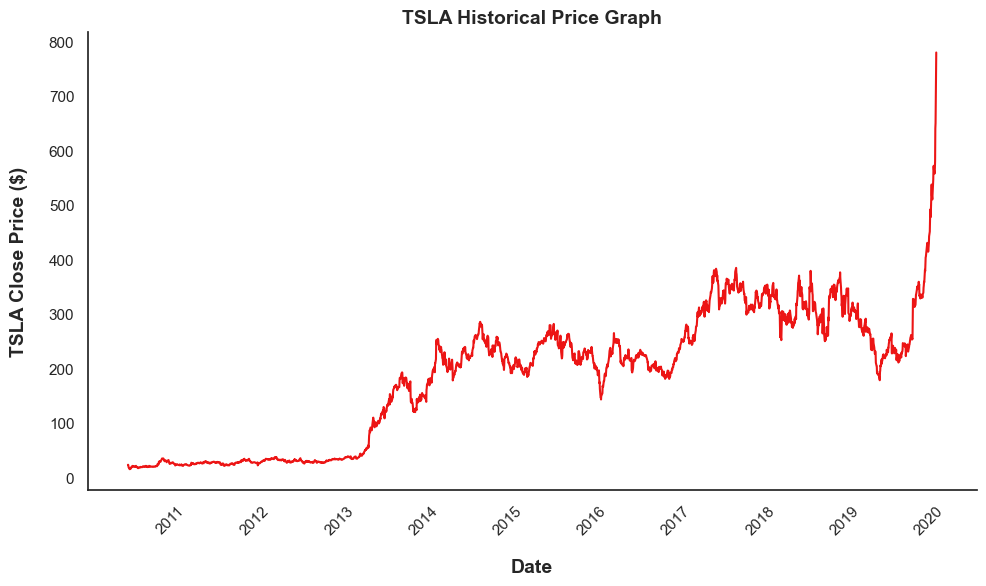

In [27]:
line_plot_func(df["Date"], df["Close"], "TSLA Historical Price Graph", "TSLA Close Price ($)")

This graph of the data's close prices already gives some interesting information. We see mostly consolidation from 2010 through 2012 and a significant impulsive move in 2013. The stock went through a nice uptrend until 2015, followed by a correction and a recovery to the previous high. 2016 saw a flash crash in the stock price followed by a "V-shaped" recovery and then higher highs into 2018. We see a couple of years of volatility followed by a downside move and then an exceptional upside move in the early stages of 2020. 

## Data Manipulation

### Adding Session Change Percentage Column.

In [31]:
df["Change %"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Change %
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,25.736837
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,-7.599848
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,-12.160004
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,-16.521735
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,-19.449995


Change % is the percentage change for the open to close price for the stock on the given trading day.

### Adding Session Volatility Percentage Column

In [35]:
df["Session Vol %"] = (df["High"] - df["Low"]) / df["Low"] * 100

In [36]:
df.head()

,Date,Open,High,Low,Close,Volume,Change %,Session Vol %
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,25.736837,42.531349
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,-7.599848,30.557946
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,-12.160004,27.873705
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,-16.521735,23.463395
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,-19.449995,26.342388


Session Vol % is the percentage change for the low to high price for the stock on the given trading day.

### Adding Year and Month Columns

In [39]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [40]:
df.head()

,Date,Open,High,Low,Close,Volume,Change %,Session Vol %,Year,Month
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,25.736837,42.531349,2010,6
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,-7.599848,30.557946,2010,6
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,-12.160004,27.873705,2010,7
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,-16.521735,23.463395,2010,7
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,-19.449995,26.342388,2010,7


Doing this will help a lot with future analysis.

## Exploratory Data Analysis

### Change %

In [44]:
round(df["Change %"].min(), 6)

-19.753518

In [45]:
round(df["Change %"].max(), 6)

25.736837

In [46]:
sum(df["Change %"] > 0)

1200

In [47]:
sum(df["Change %"] < 0)

1210

In [48]:
df[df["Change %"] < 0]["Change %"].mean().round(6)

-1.910294

In [49]:
df[df["Change %"] > 0]["Change %"].mean().round(6)

1.98829

There were more negative intrday session then there were positive. The positive days did see greater moves than their negative counterparts.

### Session Volatility %

In [52]:
round(df["Session Vol %"].min(), 6)

0.911131

In [53]:
round(df["Session Vol %"].max(), 6)

42.531349

In [54]:
round(df["Session Vol %"].mean(), 6)

4.009676

In [55]:
df[df["Change %"] > 0]["Session Vol %"].mean().round(6)

3.946148

In [56]:
df[df["Change %"] < 0]["Session Vol %"].mean().round(6)

4.079213

Data shows a wide volatility range and that the stock tends to be more volatile during the session on down days.

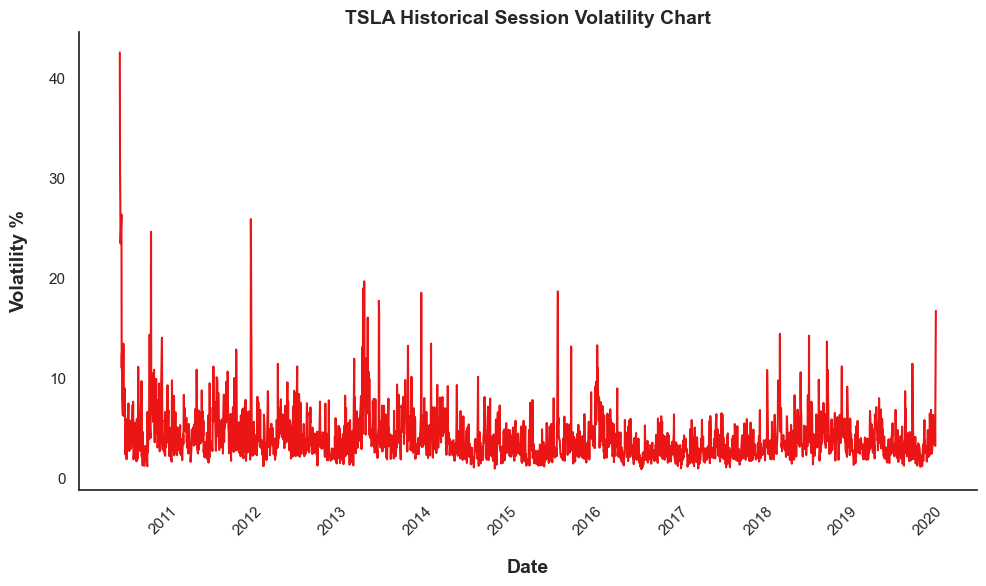

In [58]:
line_plot_func(df["Date"], df["Session Vol %"], "TSLA Historical Session Volatility Chart", "Volatility %")

Like most other risk assets, we see short periods of high volatility scattered across the timeframe. The start of the timescale is highly volatile, at around 40%, but the volatility quickly falls to around 20% for the highest peaks for the rest of the duration. 

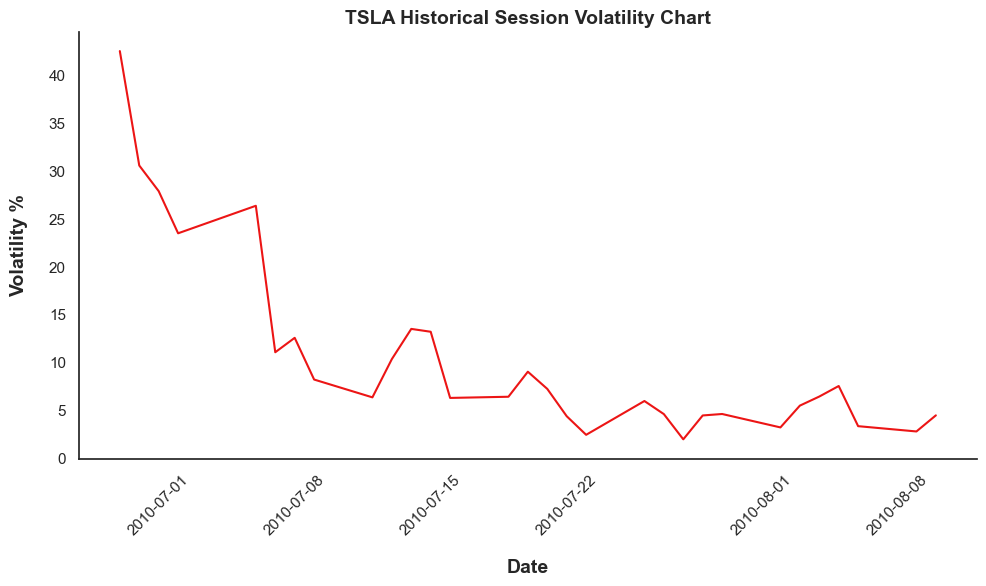

In [60]:
line_plot_func(df["Date"][:30], df["Session Vol %"][:30], "TSLA Historical Session Volatility Chart", "Volatility %")

Super high volatility at the very beginning doesn't last long.

### Date

#### Year

In [64]:
df["Year"].value_counts()

Year
2011    252
2013    252
2014    252
2015    252
2016    252
2019    252
2017    251
2018    251
2012    250
2010    130
2020     22
Name: count, dtype: int64

In [65]:
df.groupby("Year")["Close"].mean()

Year
2010     23.341846
2011     26.804762
2012     31.168600
2013    104.401230
2014    223.329088
2015    230.042898
2016    209.767262
2017    314.316295
2018    317.309921
2019    273.530198
2020    540.083639
Name: Close, dtype: float64

In [66]:
yearly_lows = df.groupby("Year")["Close"].min()
yearly_lows

Year
2010     15.800000
2011     21.830000
2012     22.790001
2013     32.910000
2014    139.339996
2015    185.000000
2016    143.669998
2017    216.990005
2018    250.559998
2019    178.970001
2020    430.260010
Name: Close, dtype: float64

In [67]:
yearly_highs = df.groupby("Year")["Close"].max()
yearly_highs

Year
2010     35.470001
2011     34.939999
2012     38.009998
2013    193.369995
2014    286.040009
2015    282.260010
2016    265.420013
2017    385.000000
2018    379.570007
2019    430.940002
2020    780.000000
Name: Close, dtype: float64

#### Bar Chart Reusable Function

In [69]:
def bar_chart_func(x_values, y_values, x_label, y_label, title):
    sns.set()
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color="#ec1515")
    plt.xticks(x_values, rotation=45)
    plt.xlabel(x_label, fontsize=14, weight="bold", labelpad=15)
    plt.ylabel(y_label, fontsize=14, weight="bold", labelpad=10)
    plt.title(title, fontsize=14, weight="bold")
    sns.despine()
    plt.tight_layout(pad=1)
    plt.show()

In [70]:
yearly_stock_data = {
    "Low": yearly_lows,
    "High": yearly_highs,
    "Price Range": yearly_highs - yearly_lows,
    "Vol %": (yearly_highs - yearly_lows) / yearly_lows * 100
}
yearly_df = pd.DataFrame(yearly_stock_data)
yearly_df

,Low,High,Price Range,Vol %
Year,,,,
2010,15.800000,35.470001,19.670001,124.493677
2011,21.830000,34.939999,13.109999,60.054966
2012,22.790001,38.009998,15.219997,66.783661
2013,32.910000,193.369995,160.459995,487.572151
2014,139.339996,286.040009,146.700013,105.282056
2015,185.000000,282.260010,97.260010,52.572978
2016,143.669998,265.420013,121.750015,84.742825
2017,216.990005,385.000000,168.009995,77.427527
2018,250.559998,379.570007,129.010009,51.488669


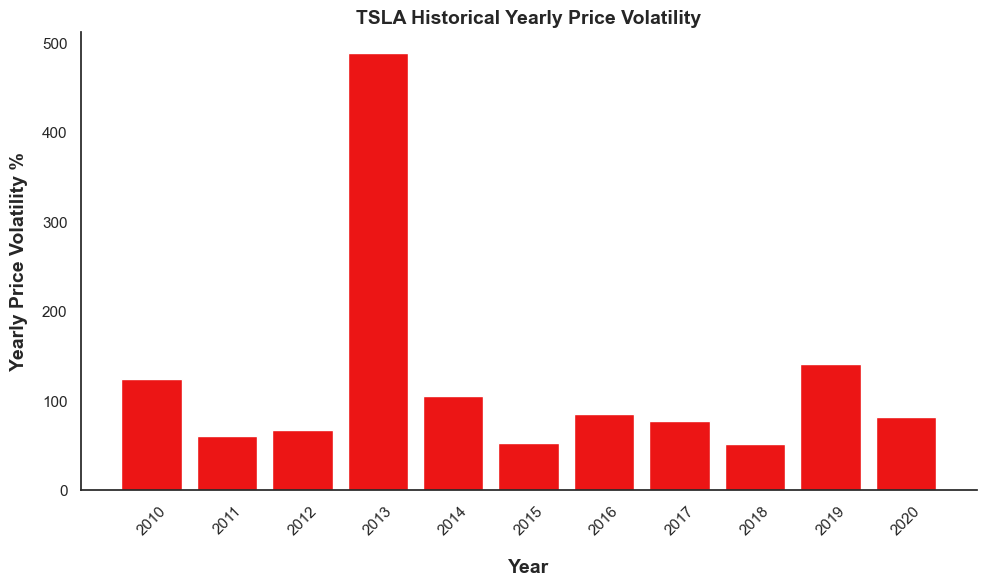

In [71]:
bar_chart_func(yearly_df.index, yearly_df["Vol %"], "Year", "Yearly Price Volatility %", "TSLA Historical Yearly Price Volatility")

2013 saw a major volatility and a positive price surge for the stock.

#### Month

In [74]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_stock_data = {
    "Month": months,
    "Avg Volume": df.groupby("Month")["Volume"].mean()
}
monthly_df = pd.DataFrame(monthly_stock_data)
monthly_df

,Month,Avg Volume
Month,,
1,January,6.096573e+06
2,February,5.560205e+06
3,March,4.897830e+06
4,April,5.762770e+06
5,May,6.783542e+06
6,June,6.247495e+06
7,July,5.512618e+06
8,August,5.230768e+06
9,September,4.767019e+06


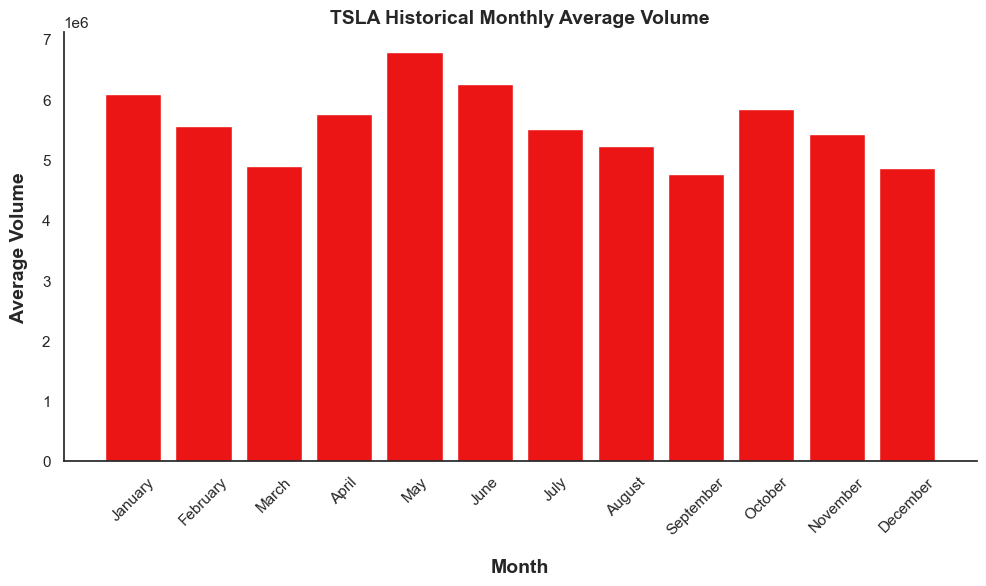

In [75]:
bar_chart_func(monthly_df["Month"], monthly_df["Avg Volume"], "Month", "Average Volume", "TSLA Historical Monthly Average Volume")

The distribution isn't uniform as some months typically see more trading volume than others.

### Monthly Performance For Each Year

In [78]:
starting_month_dates = df.groupby(["Year", "Month"])["Date"].min()
starting_month_dates

Year  Month
2010  6       2010-06-29
      7       2010-07-01
      8       2010-08-02
      9       2010-09-01
      10      2010-10-01
                 ...    
2019  10      2019-10-01
      11      2019-11-01
      12      2019-12-02
2020  1       2020-01-02
      2       2020-02-03
Name: Date, Length: 117, dtype: datetime64[ns]

In [79]:
ending_month_dates = df.groupby(["Year", "Month"])["Date"].max()
ending_month_dates

Year  Month
2010  6       2010-06-30
      7       2010-07-30
      8       2010-08-31
      9       2010-09-30
      10      2010-10-29
                 ...    
2019  10      2019-10-31
      11      2019-11-29
      12      2019-12-31
2020  1       2020-01-31
      2       2020-02-03
Name: Date, Length: 117, dtype: datetime64[ns]

In [80]:
len(starting_month_dates)

117

In [81]:
len(ending_month_dates)

117

In [82]:
start_opening_prices = df[df["Date"].isin(starting_month_dates)].set_index(["Year", "Month"])[["Open"]]
start_opening_prices

Open
Year Month            
2010 6       19.000000
     7       25.000000
     8       20.500000
     9       19.620001
     10      20.690001
...                ...
2019 10     241.500000
     11     316.320007
     12     329.399994
2020 1      424.500000
     2      673.690002

[117 rows x 1 columns]

In [83]:
end_closing_prices = df[df["Date"].isin(ending_month_dates)].set_index(["Year", "Month"])[["Close"]]
end_closing_prices

Close
Year Month            
2010 6       23.830000
     7       19.940001
     8       19.480000
     9       20.410000
     10      21.840000
...                ...
2019 10     314.920013
     11     329.940002
     12     418.329987
2020 1      650.570007
     2      780.000000

[117 rows x 1 columns]

In [199]:
monthly_closing_diff = start_opening_prices.join(end_closing_prices)
monthly_closing_diff

Open       Close
Year Month                        
2010 6       19.000000   23.830000
     7       25.000000   19.940001
     8       20.500000   19.480000
     9       19.620001   20.410000
     10      20.690001   21.840000
...                ...         ...
2019 10     241.500000  314.920013
     11     316.320007  329.940002
     12     329.399994  418.329987
2020 1      424.500000  650.570007
     2      673.690002  780.000000

[117 rows x 2 columns]

In [85]:
monthly_closing_diff["Difference"] = monthly_closing_diff["Close"] - monthly_closing_diff["Open"]
monthly_closing_diff

Open       Close  Difference
Year Month                                    
2010 6       19.000000   23.830000    4.830000
     7       25.000000   19.940001   -5.059999
     8       20.500000   19.480000   -1.020000
     9       19.620001   20.410000    0.789999
     10      20.690001   21.840000    1.149999
...                ...         ...         ...
2019 10     241.500000  314.920013   73.420013
     11     316.320007  329.940002   13.619995
     12     329.399994  418.329987   88.929993
2020 1      424.500000  650.570007  226.070007
     2      673.690002  780.000000  106.309998

[117 rows x 3 columns]

In [86]:
monthly_closing_diff["Change %"] = monthly_closing_diff["Difference"] / monthly_closing_diff["Open"] * 100

In [87]:
monthly_closing_diff

Open       Close  Difference   Change %
Year Month                                               
2010 6       19.000000   23.830000    4.830000  25.421053
     7       25.000000   19.940001   -5.059999 -20.239996
     8       20.500000   19.480000   -1.020000  -4.975610
     9       19.620001   20.410000    0.789999   4.026498
     10      20.690001   21.840000    1.149999   5.558236
...                ...         ...         ...        ...
2019 10     241.500000  314.920013   73.420013  30.401662
     11     316.320007  329.940002   13.619995   4.305765
     12     329.399994  418.329987   88.929993  26.997570
2020 1      424.500000  650.570007  226.070007  53.255596
     2      673.690002  780.000000  106.309998  15.780255

[117 rows x 4 columns]

DataFrame contains the starting price of the stock for each month and the last day's closing price for each month. It also includes the difference between the end close and start open and the percentage change in price for that month.

In [89]:
round(monthly_closing_diff["Change %"].max(), 6)

74.602605

In [90]:
round(monthly_closing_diff["Change %"].min(), 6)

-25.759688

In [91]:
round(monthly_closing_diff["Change %"].mean(), 6)

3.771064

The average monthly percentage gain is incredible compared to most other risk asset performances during the timespan.

In [93]:
monthly_closing_diff.loc[monthly_closing_diff["Change %"].idxmax()]

Open          55.990002
Close         97.760002
Difference    41.770000
Change %      74.602605
Name: (2013, 5), dtype: float64

Largest increase in stock price for a month by percentage happened in May of 2013

In [95]:
monthly_closing_diff.loc[monthly_closing_diff["Change %"].idxmin()]

Open          35.869999
Close         26.629999
Difference    -9.240000
Change %     -25.759688
Name: (2010, 12), dtype: float64

Largest decrease in stock price for a month by percentage happend in Decemeber 2010

In [175]:
monthly_returns = monthly_closing_diff.groupby("Month")["Change %"].mean()
monthly_returns

Month
1      7.710830
2      5.672176
3      1.316348
4      4.772831
5      6.390784
6     10.605492
7     -3.379804
8      1.563416
9     -0.138750
10     1.513653
11     8.150777
12     1.191692
Name: Change %, dtype: float64

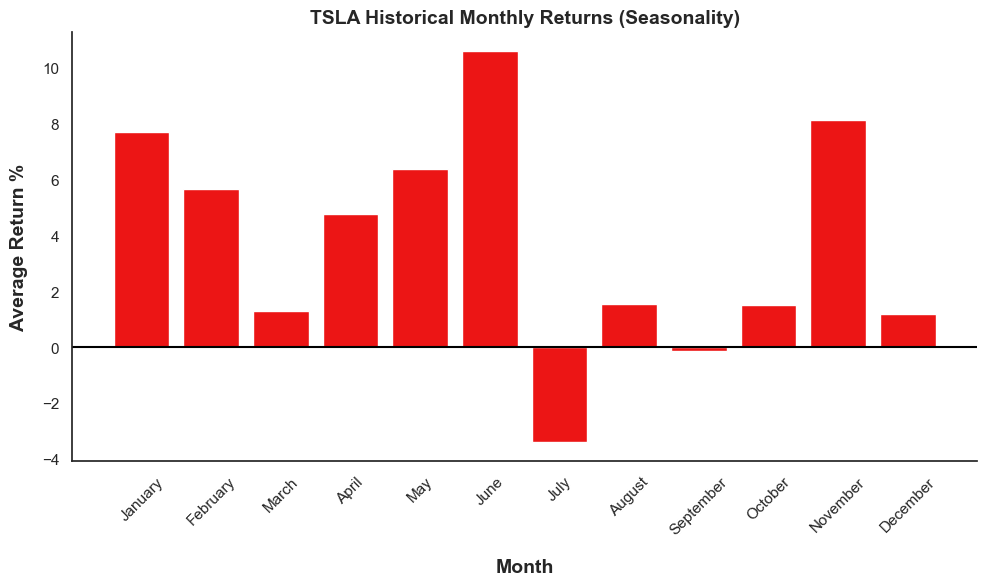

In [183]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns.index, monthly_returns, color="#ec1515")
plt.axhline(0, color="#000000", linewidth=1.5)
plt.xticks(monthly_returns.index, months, rotation=45)
plt.xlabel("Month", fontsize=14, weight="bold", labelpad=15)
plt.ylabel("Average Return %", fontsize=14, weight="bold", labelpad=10)
plt.title("TSLA Historical Monthly Returns (Seasonality)", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

In [97]:
monthly_closing_diff.reset_index(inplace=True)
monthly_closing_diff

,Year,Month,Open,Close,Difference,Change %
0,2010,6,19.000000,23.830000,4.830000,25.421053
1,2010,7,25.000000,19.940001,-5.059999,-20.239996
2,2010,8,20.500000,19.480000,-1.020000,-4.975610
3,2010,9,19.620001,20.410000,0.789999,4.026498
4,2010,10,20.690001,21.840000,1.149999,5.558236
...,...,...,...,...,...,...
112,2019,10,241.500000,314.920013,73.420013,30.401662
113,2019,11,316.320007,329.940002,13.619995,4.305765
114,2019,12,329.399994,418.329987,88.929993,26.997570
115,2020,1,424.500000,650.570007,226.070007,53.255596


Can now concatenate Year and Month as a uniform x-axis for visualization.

In [99]:
monthly_closing_diff["Date"] = monthly_closing_diff["Year"].astype(str) + "-" + monthly_closing_diff["Month"].astype(str)
monthly_closing_diff

,Year,Month,Open,Close,Difference,Change %,Date
0,2010,6,19.000000,23.830000,4.830000,25.421053,2010-6
1,2010,7,25.000000,19.940001,-5.059999,-20.239996,2010-7
2,2010,8,20.500000,19.480000,-1.020000,-4.975610,2010-8
3,2010,9,19.620001,20.410000,0.789999,4.026498,2010-9
4,2010,10,20.690001,21.840000,1.149999,5.558236,2010-10
...,...,...,...,...,...,...,...
112,2019,10,241.500000,314.920013,73.420013,30.401662,2019-10
113,2019,11,316.320007,329.940002,13.619995,4.305765,2019-11
114,2019,12,329.399994,418.329987,88.929993,26.997570,2019-12
115,2020,1,424.500000,650.570007,226.070007,53.255596,2020-1


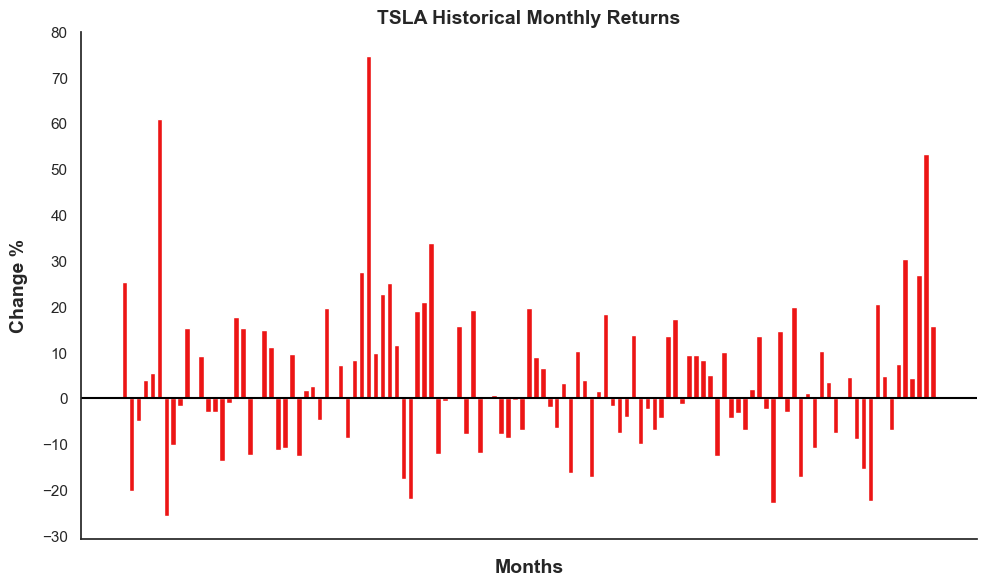

In [160]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.bar(monthly_closing_diff["Date"],  monthly_closing_diff["Change %"], color="#ec1515")
plt.axhline(0, color="#000000", linewidth=1.5)
plt.xticks("")
plt.yticks(range(-30, 81, 10))
plt.xlabel("Months", fontsize=14, weight="bold")
plt.ylabel("Change %", fontsize=14, weight="bold", labelpad=10)
plt.title("TSLA Historical Monthly Returns", fontsize=14, weight="bold")
sns.despine()
plt.tight_layout(pad=1)
plt.show()

## Conclusion

Based on my analysis of the TSLA stock data, I came up with multiple insights and findings about its past performance.

### Insight # 1: High Volatility

I know that to this day, Tesla is one of the more volatile stocks out there, but while it was a smaller-cap stock, it was even more volatile than it is today. There were days when the stock was down more than 15% and days when it was up almost 25%. There were also multiple months when the price was up over 50% and months when it was down over 20%. So, investors holding significant positions in this stock saw drastic fluctuations in their portfolios over the timespan and hopefully calculated their risk accordingly.

### Insight #2: Major Returns

I won't go into too much detail here because the information is pretty easy to access, but early investors of Tesla got rewarded big time. The time span for this data is: June 29th, 2010, to February 3rd, 2020, and in that time, the stock increased by 4,005%! While the stock was very volatile, the returns to the upside were enormous, and any bear market was quickly ended by investors entering or entering the market. 

### Insight #3: Price Seasonality

Like many other stocks and the market in general TSLA saw clear price seasonality across the differnent months. July and September were the only months that the stock was down on average. September was down less than 1%, and July was down just over 3% on average each year. All the other months were green, with June, on average, creating 10% gains for the stock. Other big gaining months were January and November, which saw an average of 8% gains each year. So with this data spanning over 10 years, there is a trend here that traders could've taken advantage of to buy in at better prices and maybe even try to sell positions at higher prices.

### Insight #4: Volume Seasonality

Very similar to price, we see clear seasonality in trading volume as well in the timespan. While the outliers aren't too severe, it's clear that volume seemed to peak in May and follow a downtrend until September, when it bottomed. October's average then saw a spike and then a downtrend for the last two months of the year. The average volume spikes again in January and then spirals down and bottoms in March, followed by an increase to the May peak. This information would also have been really important for traders and helping them navigate this volatile stock.

### Insight #5: 2013 and 2020 Breakouts

2013 sees a major price spike to the upside and a massive increase in volatility. Cleary major advancements at Tesla happened around this time, and investor sentiment became drastically more positive. We also saw the same thing happen in 2020, and while the data started to get cut off during this move, clearly, big news drove this impulsive move. I think this clearly shows Tesla's volatility and maybe even insight into what moves this stock. Going back in time to see what drove these moves could even help future investors better understand how the stock might fluctuate in the future.